<a href="https://colab.research.google.com/github/Diwakar-Gupta/LrcDataScience/blob/main/22-01-31-Decision_Tree/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x1 = np.linspace(0, 1, 20)
x2 = 1 - x1

ye = -x1*np.log2(x1) - x2*np.log2(x2)
yg = 1 - (x1*x1 + x2*x2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [ ]:
ye[0] = 0
ye[-1] = 0

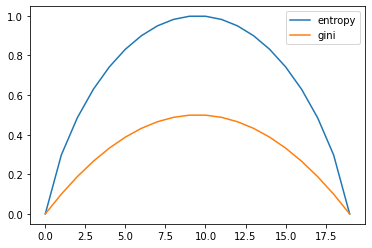

In [ ]:
plt.plot(ye, label = 'entropy')
plt.plot(yg, label = 'gini')
plt.legend()

In [ ]:
x = np.arange(5)
y = x%2

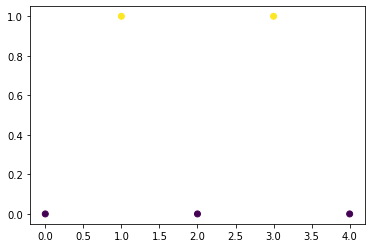

In [ ]:
plt.scatter(x, y, c = y)

In [ ]:
X = x.reshape(-1, 1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)
model.fit(X, y)

DecisionTreeClassifier(max_depth=10)

In [ ]:
model.get_depth()

4

In [ ]:
model.score(X, y)

1.0

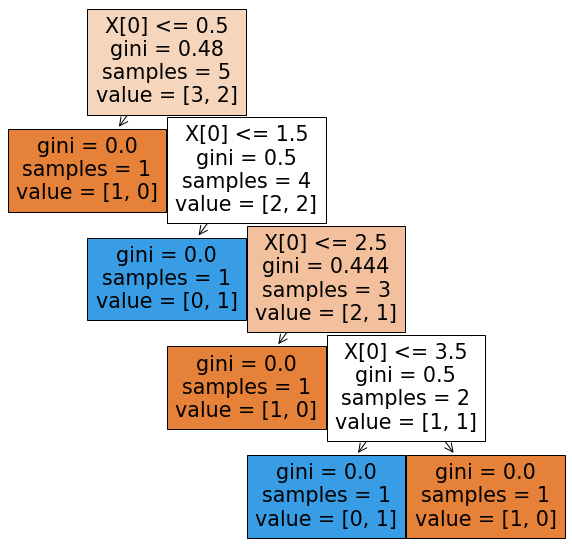

In [ ]:
from sklearn import tree

plt.figure(figsize = (10, 10))
tree.plot_tree(model, filled = True)
plt.show()

# Scratch

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/play_tennis.csv')
df = df.drop('day', axis = 1)

In [ ]:
df.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [ ]:
X = df.drop('play', axis = 1)
Y = df['play']

In [ ]:
1-((Y.value_counts()/Y.size)**2).sum()

0.4591836734693877

In [ ]:
class Node():

    def __init__(self):
        pass
    
    def fit(self, X, Y):
        self.y_dtype = Y.dtype
        self.dummy_label = Y.iloc[0]
        self.grow_tree(X, Y)
    
    def infoG(self, X, Y):
        return 0
    
    def gini(self, X, Y):
        return 1-((Y.value_counts()/Y.size)**2).sum()

    def grow_tree(self, X, Y):
        IG = self.gini(X, Y)
        if IG == 0:
            # Pure node
            self.typ = 'pure'
            self.ans = Y.iloc[0]
        else:
            self.typ = 'decision'
            H = self.gini(X, Y)
            maxIG = 0
            maxfet = ''
            for fet in X.columns:
                Ig = 0
                for clas in X[fet].unique():
                    ind = X[fet] == clas
                    nX = X[ ind ]
                    nY = Y[ ind ]
                    cursize = nX.shape[0]
                    size = X.shape[0]
                    Ig = Ig + cursize*self.gini(nX, nY) / size
                
                currIG = H - Ig
                if currIG > maxIG:
                    maxIG = currIG
                    maxfet = fet
            # best split feature is calculated
            self.fet = maxfet
            self.decision = {}
            for clas in X[maxfet].unique():
                node = Node()
                self.decision[clas] = node
                
                idx = X[maxfet] == clas
                nX = X[idx]
                nY = Y[idx]
                node.grow_tree(nX, nY)

    def pred(self, x):
        if self.typ == 'pure':
            return self.ans
        else:
            val = x[self.fet]
            return self.decision[val].pred(x)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.dummy_label, dtype = self.y_dtype)

        for i, (_, x) in enumerate(X.iterrows()):
            lab = self.pred(x)
            y_pred[i] = lab

        return y_pred

In [ ]:
model = Node()
model.fit(X, Y)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y, model.predict(X))

1.0

In [ ]:
model.typ
print(model.fet)
model.decision

outlook


{'Overcast': <__main__.Node at 0x7f4889dd2a90>,
 'Rain': <__main__.Node at 0x7f4889dd2f50>,
 'Sunny': <__main__.Node at 0x7f4889d99ad0>}

In [ ]:
model.decision['Sunny'].decision['High'].typ

'pure'